In [1]:
# Dependencies

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
# Files
trained_data = pd.read_csv('Resources/train.csv')
test_data = pd.read_csv('Resources/test.csv')

In [5]:
trained_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
# Making one big DF to preprocess
data = pd.concat([trained_data,test_data], axis=0)
y_train = trained_data['SalePrice']
data = data.drop(['Id', 'SalePrice'], axis=1)
print(data.shape)

(2919, 79)


In [8]:
selected_columns = [
    "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF",
    "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd",
    "GarageYrBlt", "GarageCars", "GarageArea","SalePrice"] 
#skipped all the categorical values, probably should keep those since this
#influences homesaleprice as shown in the top features
trained_data_corr = trained_data[selected_columns]
corr = trained_data_corr.corr()
highly_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

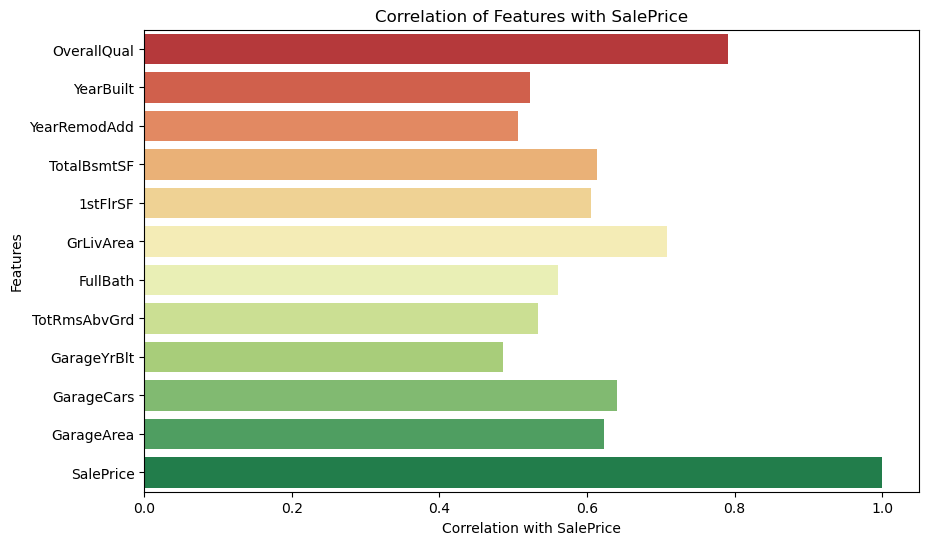

In [9]:
# Extract correlations of each feature with SalePrice
feature_correlations = corr.loc["SalePrice", selected_columns]

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_correlations.values, y=feature_correlations.index, palette="RdYlGn")

# Set labels and title
plt.xlabel("Correlation with SalePrice")
plt.ylabel("Features")
plt.title("Correlation of Features with SalePrice")

# Show the plot
plt.show()

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

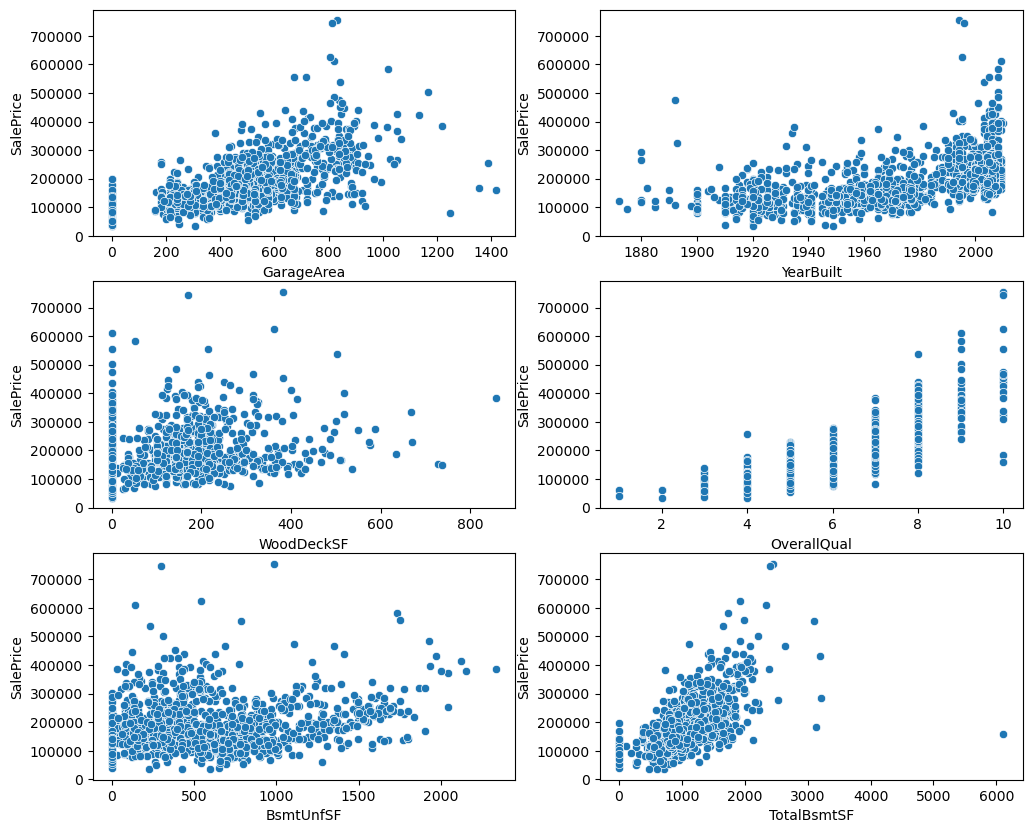

In [4]:
ig = plt.figure(figsize=(12,10))
#GarageArea
plt.subplot(321)
sns.scatterplot(data=trained_data, x='GarageArea', y="SalePrice")
#YearBuilt
plt.subplot(322)
sns.scatterplot(data=trained_data, x='YearBuilt', y="SalePrice")
#WoodDeckSF
plt.subplot(323)
sns.scatterplot(data=trained_data, x='WoodDeckSF', y="SalePrice")
#OverallQual
plt.subplot(324)
sns.scatterplot(data=trained_data, x='OverallQual', y="SalePrice")
#BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=trained_data, x='BsmtUnfSF', y="SalePrice")
#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=trained_data, x='TotalBsmtSF', y="SalePrice")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

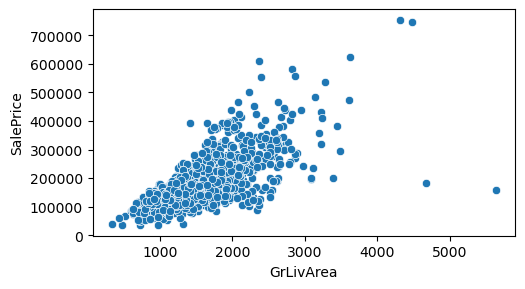

In [11]:
# GrLivArea vs SalePrice
ig = plt.figure(figsize=(12,10))
#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice")

In [21]:
# OverallQual bins
bins = [0,3,7,10]
labels = ["low", "med", "high"]
sliced = pd.cut(trained_data['OverallQual'], bins, labels = labels, include_lowest = True)
sliced

0        med
1        med
2        med
3        med
4       high
        ... 
1455     med
1456     med
1457     med
1458     med
1459     med
Name: OverallQual, Length: 1460, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

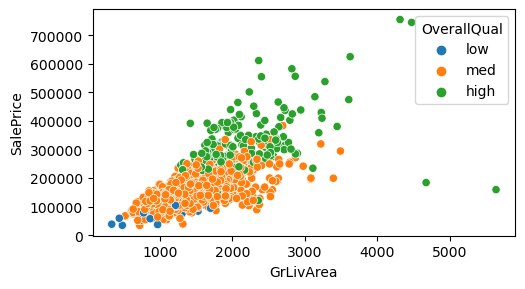

In [22]:
# GrLivArea vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12,10))
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice", hue=sliced)

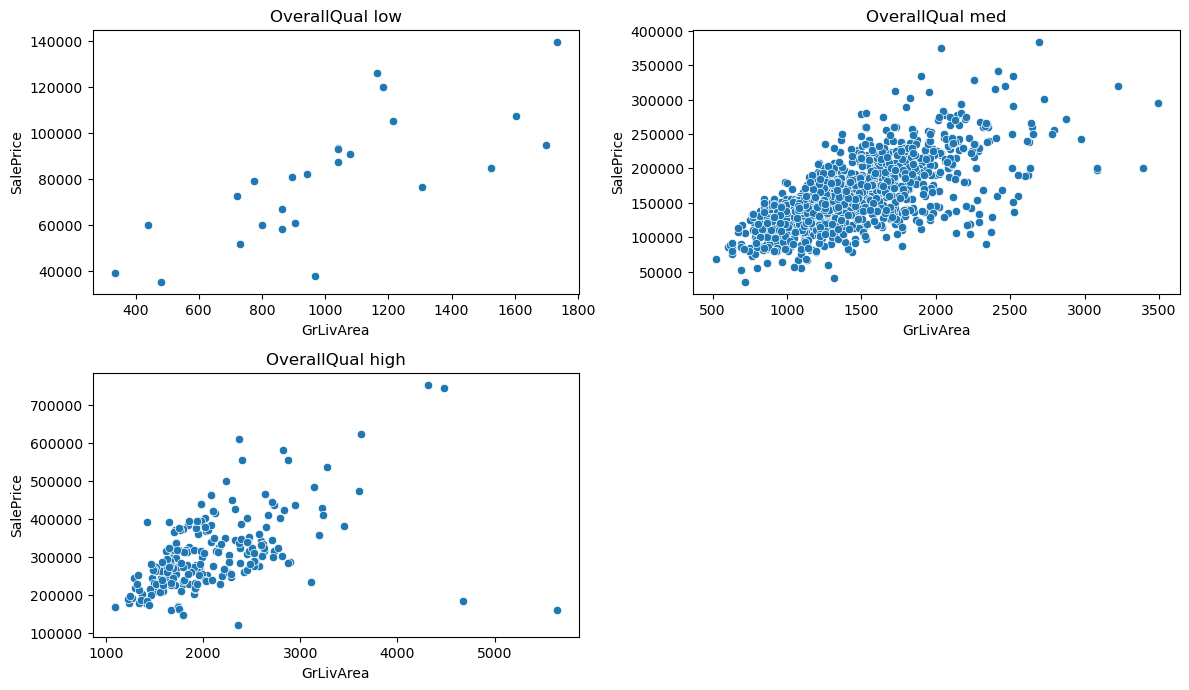

In [23]:
# GrLivArea vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12, 10))

# Create separate line graphs for each bin
for i, bin_label in enumerate(sliced.cat.categories):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows and columns as needed
    subset_data = trained_data[sliced == bin_label]
    sns.scatterplot(data=subset_data, x='GrLivArea', y="SalePrice")
    plt.title(f'OverallQual {bin_label}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

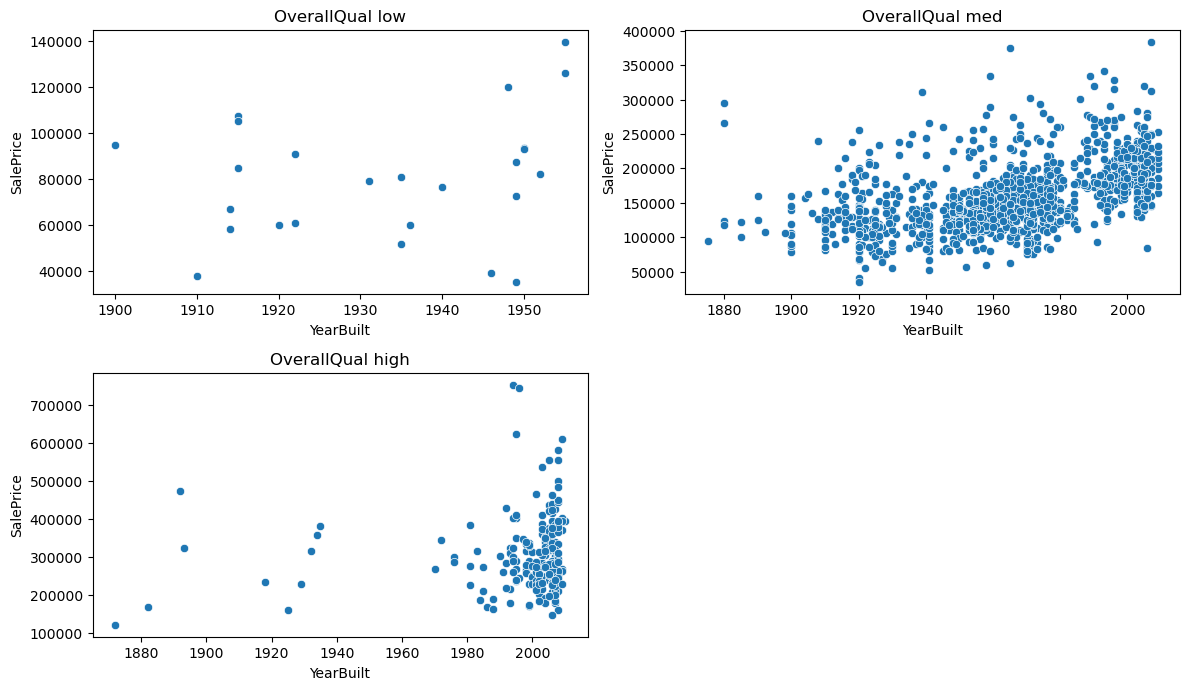

In [24]:
# YearBuilt vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12, 10))

# Create separate line graphs for each bin
for i, bin_label in enumerate(sliced.cat.categories):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows and columns as needed
    subset_data = trained_data[sliced == bin_label]
    sns.scatterplot(data=subset_data, x='YearBuilt', y="SalePrice")
    plt.title(f'OverallQual {bin_label}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
trained_data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [40]:
# Define the threshold for the minimum count
threshold = 60

# Get value counts of MSSubClass
value_counts = trained_data['MSSubClass'].value_counts()

# Create a dictionary to map values to categories
category_map = {}

# Iterate over the value counts
for value, count in value_counts.items():
    if count >= threshold:
        category_map[value] = value
    else:
        category_map[value] = 'Other'

# Map the values to categories
trained_data['MSSubClass_binned'] = trained_data['MSSubClass'].map(category_map)

# Display the DataFrame
print(trained_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [27]:
# MSSubClass bins
MSSubClass_bins = [0,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClass_labels = ["1-STORY 1946 & NEWER ALL STYLES", "1-STORY 1945 & OLDER", "1-STORY W/FINISHED ATTIC ALL AGES",
          '1-1/2 STORY - UNFINISHED ALL AGES','1-1/2 STORY FINISHED ALL AGES','2-STORY 1946 & NEWER',
          '2-STORY 1945 & OLDER','2-1/2 STORY ALL AGES','SPLIT OR MULTI-LEVEL','SPLIT FOYER',
          'DUPLEX - ALL STYLES AND AGES','1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
          '1-1/2 STORY PUD - ALL AGES','2-STORY PUD - 1946 & NEWER','PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
          '2 FAMILY CONVERSION - ALL STYLES AND AGES']
subclass_sliced = pd.cut(trained_data['MSSubClass'], MSSubClass_bins, labels = MSSubClass_labels, include_lowest = True)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

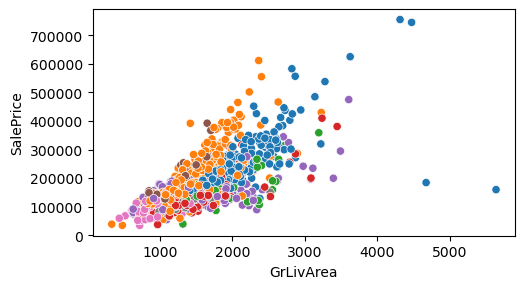

In [39]:
# GrLivArea vs SalePrice binned by MSSubClass
ig = plt.figure(figsize=(12,10))
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice", hue='MSSubClass_binned', legend=False)

ValueError: num must be an integer with 1 <= num <= 6, not 7

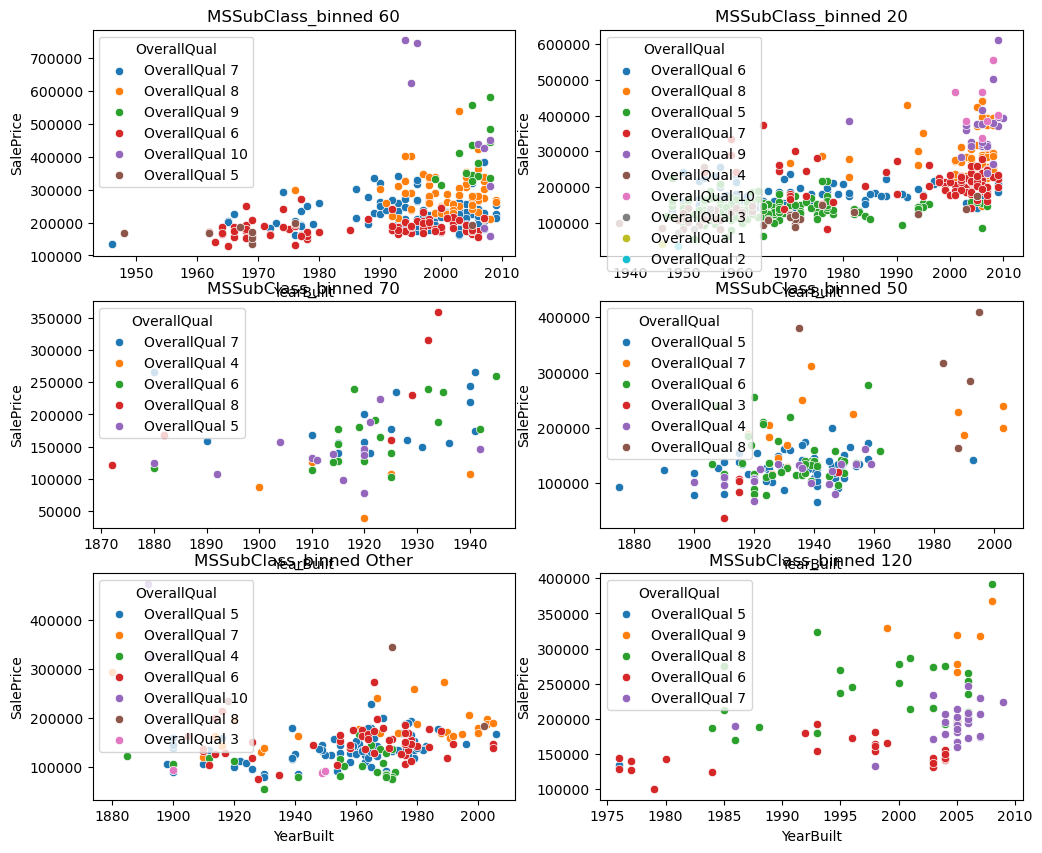

In [46]:
# YearBuilt vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12, 10))

# Define the new bins based on MSSubClass_binned
MSSubClass_bins = trained_data['MSSubClass_binned'].unique()

# Create separate scatterplots for each bin in MSSubClass_binned
for i, bin_label in enumerate(MSSubClass_bins):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows and columns as needed
    subset_data = trained_data[trained_data['MSSubClass_binned'] == bin_label]
    for overall_qual in subset_data['OverallQual'].unique():
        subset_subset_data = subset_data[subset_data['OverallQual'] == overall_qual]
        sns.scatterplot(data=subset_subset_data, x='YearBuilt', y="SalePrice", label=f'OverallQual {overall_qual}')
    plt.title(f'MSSubClass_binned {bin_label}')
    plt.legend(title='OverallQual')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()